In [3]:
!pip install --upgrade pip

In [18]:
import numpy as np 
import pandas as pd 
import random

In [1]:
%%bash
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 569.4 kB/s eta 0:00:00


In [2]:
# install openpyxl to read excel files
! pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
covid = pd.read_excel('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
covid.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [8]:
normal = pd.read_excel('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/Normal.metadata.xlsx')
normal.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [9]:
viral_pneumonia = pd.read_excel('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx')
viral_pneumonia.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [10]:
# Check the numbers of each cases
print("Covid cases: ", str(len(covid)))
print("Normal cases: ", str(len(normal)))
print("Viral Pneumonia cases: ", str(len(viral_pneumonia)))

Covid cases:  3616
Normal cases:  10192
Viral Pneumonia cases:  1345


Her sınıfın en az sayısı 1345'tir. Bu nedenle, örneklem büyüklüğünü 1345 örnek olarak ayarladım.

In [11]:
SAMPLE_SIZE = 1345

In [12]:
# her vaka için etiket 
covid['label'] = 0
normal['label'] = 1
viral_pneumonia['label'] = 2

In [13]:
# Gereksiz sutünları silme işlemi
covid = covid[['FILE NAME', 'label']]
normal = normal[['FILE NAME', 'label']]
viral_pneumonia = viral_pneumonia[['FILE NAME', 'label']]

In [14]:
# Veri Setinin görünümü
covid.head()

,FILE NAME,label
0,COVID-1,0
1,COVID-2,0
2,COVID-3,0
3,COVID-4,0
4,COVID-5,0


In [15]:
# covid ve normal vakalar için örnekleme verileri
df_0 = covid.sample(SAMPLE_SIZE, random_state=26)
df_1 = normal.sample(SAMPLE_SIZE, random_state=26)

#Dataframe birleştirme
data = pd.concat([df_0, df_1, viral_pneumonia], axis=0).reset_index(drop=True)

# Toplam Etiketleri
data['label'].value_counts()

0    1345
1    1345
2    1345
Name: label, dtype: int64

In [21]:
import random

# Assuming 'data' is a pandas DataFrame
data = data.sample(frac=1).reset_index(drop=True)
data.head()


,FILE NAME,label
0,COVID-2426,0
1,COVID-1242,0
2,NORMAL-3303,1
3,NORMAL-2547,1
4,COVID-1423,0


## Train Test Split

In [24]:
df_train, df_val = train_test_split(data, test_size=0.20, random_state=26, stratify=data['label'])

print(df_train.shape)
print(df_val.shape)

(3228, 2)
(807, 2)


In [25]:
df_train['label'].value_counts()

1    1076
2    1076
0    1076
Name: label, dtype: int64

In [26]:
df_val['label'].value_counts()

1    269
2    269
0    269
Name: label, dtype: int64

## Creating Directories

In [28]:
import os
#Yeni dizin oluşturma
base_dir = 'base_dir'
os.mkdir(base_dir)


# create 2 folders inside 'base_dir':
# base_dir
  ## train_dir
     ### covid
     ### normal
     ### viral_pneumonia
  ## val_dir
     ### covid
     ### normal
     ### viral_pneumonia

# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
train_covid = os.path.join(train_dir, 'covid')
os.mkdir(train_covid)
train_normal = os.path.join(train_dir, 'normal')
os.mkdir(train_normal)
train_viral_pneumonia = os.path.join(train_dir, 'viral pneumonia')
os.mkdir(train_viral_pneumonia)

# create new folders inside val_dir
val_covid = os.path.join(val_dir, 'covid')
os.mkdir(val_covid)
val_normal = os.path.join(val_dir, 'normal')
os.mkdir(val_normal)
val_viral_pneumonia = os.path.join(val_dir, 'viral pneumonia')
os.mkdir(val_viral_pneumonia)

In [29]:
# train_dir içindeki klasörleri kontrol edin
os.listdir('base_dir/train_dir')

['viral pneumonia', 'covid', 'normal']

## Transfer Images into Folders

In [30]:
train_list = list(df_train['FILE NAME'])
val_list = list(df_val['FILE NAME'])


In [32]:
# GÖrüntüleri train_dir dosyasına kopyalama
for image in train_list:
    
    # add .png extension 
    filename = image + '.png'
    # get the label for a certain image
    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)
    
    # match the target with the folder's name and source path of the image
    if target == 0:
        label = 'covid'
        src = os.path.join('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/COVID/images', filename)
        
    if target == 1:
        label = 'normal'
        # As 'FILE NAME's in .xlsx file begins with 'NORMAL' but real file names begin with 'Normal'
        filename = filename.capitalize()
        src = os.path.join('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/Normal/images', filename)
        
    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)
  
    # destination path to image
    dst = os.path.join(train_dir, label, filename)
    
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

# Copy images to val_dir folder
for image in val_list:
    
    # add .png extension 
    filename = image + '.png'
    # get the label for a certain image
    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)
    
    # match the target with the folder's name and source path of the image
    if target == 0:
        label = 'covid'
        src = os.path.join('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/COVID/images', filename)
        
    if target == 1:
        label = 'normal'
        filename = filename.capitalize()
        src = os.path.join('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/Normal/images', filename)
        
    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('/home/suhedata/Desktop/COVID-19_Radiography_Dataset/Viral Pneumonia/images', filename)
  
    # destination path to image
    dst = os.path.join(val_dir, label, filename)
    
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [33]:
# her klasördeki train  görüntülerinin sayısını kontrol et
print(len(os.listdir('base_dir/train_dir/covid')))
print(len(os.listdir('base_dir/train_dir/normal')))
print(len(os.listdir('base_dir/train_dir/viral pneumonia')))

1076
1076
1076


In [34]:
# # her klasördeki validation görüntülerinin sayısını kontrol et
print(len(os.listdir('base_dir/val_dir/covid')))
print(len(os.listdir('base_dir/val_dir/normal')))
print(len(os.listdir('base_dir/val_dir/viral pneumonia')))

269
269
269


==================== End of Files Preparation ====================

# Image Classification

In [35]:
BATCH_SIZE = 32
IMG_SIZE = (256  , 256)
train_directory = "base_dir/train_dir"
val_directory = "base_dir/val_dir"
                                  

## Generate Train/Val Dataset

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=0.2,
        shear_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=IMG_SIZE,
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_directory,
        target_size=IMG_SIZE,
        color_mode='grayscale',
        batch_size=32,
        shuffle=False,
        class_mode='categorical')

Found 3228 images belonging to 3 classes.
Found 807 images belonging to 3 classes.


In [37]:
# check classes in train_generator
train_generator.class_indices

{'covid': 0, 'normal': 1, 'viral pneumonia': 2}

Take a look to some of samples in `train_generator`

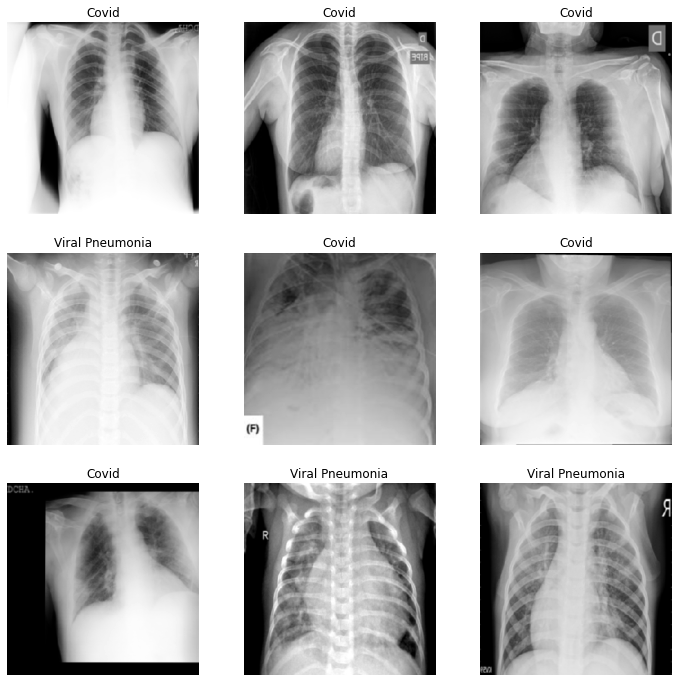

In [38]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img, label = train_generator.next()
    plt.imshow(img[0], cmap='gray')
    dic = {0:'Covid', 1:'Normal', 2:'Viral Pneumonia'}
    plt.title(dic.get(np.where(label[0]==1)[0][0]))
    plt.axis('off')
plt.show()

## Model Fitting
The model architecture is based on VGG-16 model, including 3x3 filter for convolutions layer and 2x2 filter for pooling layers, doubling the number of filters and three fully-connected layers.

In [39]:
#Kendim oluşturduğum model
def covid_model1(IMG_SIZE):
    input_shape = IMG_SIZE + (1, )
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", padding='same',input_shape=input_shape),
        MaxPooling2D(pool_size = (2, 2)), 
        Conv2D(32, (3, 3), padding='same', activation="relu"),
        MaxPooling2D(pool_size = (2, 2)), 
        Conv2D(64, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(64, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(256, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Flatten(),
       
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=3, activation='softmax')
    ])
    return model

In [40]:
# recheck the image size
IMG_SIZE

(256, 256)

In [41]:
model1 = covid_model1(IMG_SIZE)

2023-06-12 23:54:42.124195: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/google/chrome:/opt/google/chrome/lib
2023-06-12 23:54:42.124354: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-12 23:54:42.124489: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (suheda): /proc/driver/nvidia/version does not exist
2023-06-12 23:54:42.126466: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [43]:
base_learning_rate = 0.001
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [45]:
initial_epochs = 15
history = model1.fit(train_generator, epochs=initial_epochs, 
                     validation_data = validation_generator, callbacks=[early_stopping])

Epoch 1/15


2023-06-12 23:54:55.347965: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.
2023-06-12 23:54:55.786648: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2023-06-12 23:54:55.860620: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2023-06-12 23:54:56.023988: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2023-06-12 23:54:56.276706: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28311552 exceeds 10% of free system memory.


101/101 [==============================] - 258s 3s/step - loss: 0.8281 - accuracy: 0.5675 - val_loss: 0.5790 - val_accuracy: 0.7398
Epoch 2/15
101/101 [==============================] - 272s 3s/step - loss: 0.6061 - accuracy: 0.7302 - val_loss: 0.5329 - val_accuracy: 0.7633
Epoch 3/15
101/101 [==============================] - 271s 3s/step - loss: 0.5364 - accuracy: 0.7704 - val_loss: 0.4889 - val_accuracy: 0.7856
Epoch 4/15
101/101 [==============================] - 267s 3s/step - loss: 0.4840 - accuracy: 0.8024 - val_loss: 0.4349 - val_accuracy: 0.8203
Epoch 5/15
101/101 [==============================] - 272s 3s/step - loss: 0.3902 - accuracy: 0.8377 - val_loss: 0.4146 - val_accuracy: 0.8327
Epoch 6/15
101/101 [==============================] - 267s 3s/step - loss: 0.3073 - accuracy: 0.8838 - val_loss: 0.3223 - val_accuracy: 0.8773
Epoch 7/15
101/101 [==============================] - 269s 3s/step - loss: 0.2395 - accuracy: 0.9061 - val_loss: 0.2832 - val_accuracy: 0.8786
Epoch 8/15

## Model Evaluation

In [46]:
# Evaluate the model by getting its final loss and accuracy
model1.evaluate(validation_generator)

26/26 [==============================] - 11s 437ms/step - loss: 0.2361 - accuracy: 0.9133


[0.23606303334236145, 0.913258969783783]

In [47]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='r', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='r', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    
    plt.show()

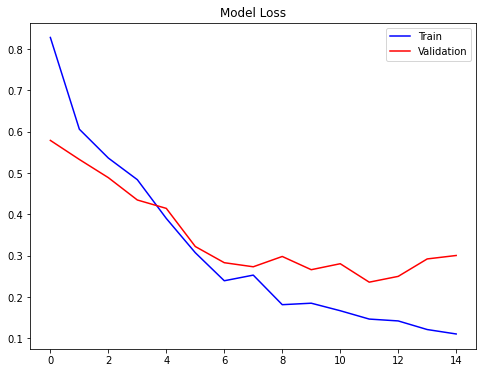

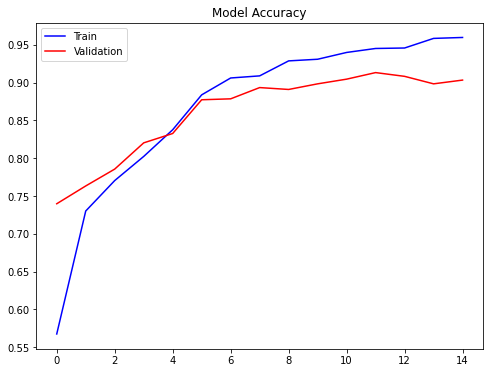

In [48]:
plot_loss_acc(history)

## ClassificaitonConfusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [50]:
# predict classes of validation dataset
val_predict = model1.predict(validation_generator)

26/26 [==============================] - 12s 441ms/step


In [51]:
predict_class = np.argmax(val_predict, axis=1)
predict_class = predict_class.tolist()

In [52]:
labels = ['Covid', 'Normal', 'Viral Pneumonia']
report = classification_report(validation_generator.classes, predict_class, target_names=labels)
print(report)

                 precision    recall  f1-score   support

          Covid       0.90      0.89      0.90       269
         Normal       0.87      0.90      0.88       269
Viral Pneumonia       0.97      0.95      0.96       269

       accuracy                           0.91       807
      macro avg       0.91      0.91      0.91       807
   weighted avg       0.91      0.91      0.91       807



In [53]:
cm = confusion_matrix(validation_generator.classes, predict_class)
cm_df = pd.DataFrame(cm,
                     index = ['COVID','NORMAL','VIRAL PNEUMONIA'], 
                     columns = ['COVID','NORMAL','VIRAL PNEUMONIA'])

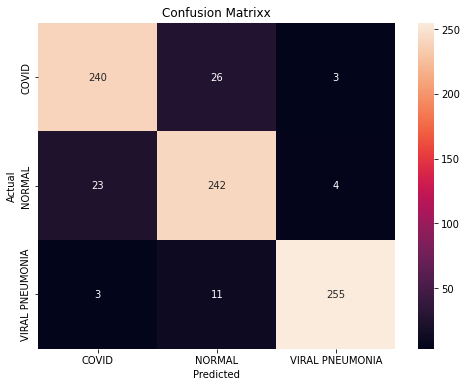

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title("Confusion Matrixx")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
# Importing Keras for Image Classification
import keras
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, AveragePooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [56]:
# ResNet Kütüphane
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import ResNet50
from sklearn.model_selection import train_test_split
import os

In [57]:
# VGG19 Kütüphane
import keras
from keras.applications.vgg19 import VGG19

In [59]:
from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')

model2 = Sequential()
model2.add(resnet_model)
model2.add(Dense(5, activation='softmax'))
model2.layers[0].trainable = False
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# resnet_model özetini de alabilirsiniz
resnet_model.summary()


94765736/94765736 [==============================] - 74s 1us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_3 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                

In [60]:
base_learning_rate = 0.001
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [64]:
initial_epochs = 15
history = model2.fit(train_generator, epochs=initial_epochs, 
                     validation_data = validation_generator, callbacks=[early_stopping])

Epoch 1/15


2023-06-13 08:30:28.603388: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops_fused_impl.h:679 : INVALID_ARGUMENT: input depth must be evenly divisible by filter depth: 1 vs 3


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/resnet50/conv1_conv/BiasAdd' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/suhedata/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/suhedata/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/home/suhedata/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/suhedata/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/suhedata/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/suhedata/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/suhedata/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/suhedata/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/suhedata/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/suhedata/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/suhedata/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/suhedata/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/suhedata/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/suhedata/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/suhedata/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_98485/2183214725.py", line 2, in <cell line: 2>
      history = model2.fit(train_generator, epochs=initial_epochs,
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/suhedata/.local/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 269, in call
      outputs = tf.nn.bias_add(
Node: 'sequential_2/resnet50/conv1_conv/BiasAdd'
input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential_2/resnet50/conv1_conv/BiasAdd}}]] [Op:__inference_train_function_23651]